# Model: Logistic Regression

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [3]:
df = pd.read_excel('../top10_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [5]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [6]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [7]:
# Importing the model
from sklearn.linear_model import LogisticRegression

# Fitting and training
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Printing out Evaluation Metrics

In [8]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.80      0.44      0.57         9
         Buy       0.50      0.86      0.63         7
        Hold       0.00      0.00      0.00         1

    accuracy                           0.59        17
   macro avg       0.43      0.43      0.40        17
weighted avg       0.63      0.59      0.56        17



C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix

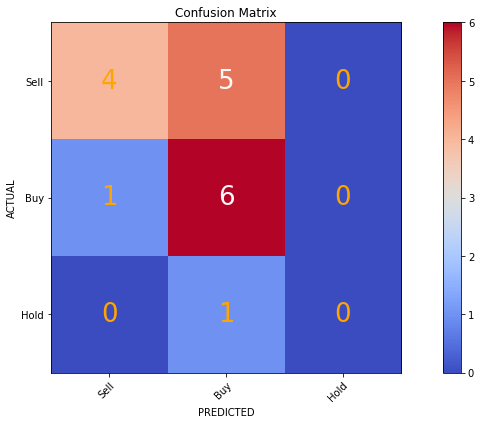

In [9]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [10]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [11]:
# Parameters to Tune
params = {'penalty': ['l1', 'l2'],
          'C': [1.5**n for n in range(0, 20, 5)],
          'fit_intercept': [True, False],
          'intercept_scaling': [1, 10, 50, 100],
          'solver': ['liblinear', 'saga']}

In [12]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.511, test=0.327), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.450, test=0.253), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.491, test=0.293), total=   0.1s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=1.0, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapse

[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.432, test=0.253), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.510, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.523, test=0.263), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.510, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=Tr

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', 

[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.463, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.432, test=0.253), total=   0.1s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.510, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.523, test=0.299), total=   0.0s
[CV] C=1.0, fit_int

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this w


[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.523, test=0.299), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.511, test=0.327), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.478, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.450, test=0.253), total=   0.0s
[CV] C=1.0, fit_in

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver


[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.523, test=0.299), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.511, test=0.327), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.478, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l1

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.523, test=0.299), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.510, test=0.293), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.523, test=0.299), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.484, test=0.411), total=   0.0s
[CV] C=1.0, fit_intercept=F

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "


[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.560, test=0.258), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.472, test=0.228), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.525, test=0.412), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.514, test=0.233), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=10, p

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.545, test=0.376), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.560, test=0.258), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.472, test=0.228), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.525, test=0.412), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.514, test=0.233), total=   0.0s
[CV] C=1.0

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option

[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.484, test=0.411), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.493, test=0.308), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.583, test=0.258), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.477, test=0.263), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.545, test=0.376), total=   0.0s
[CV] C

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.546, test=0.412), total=   0.0s
[CV] C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=1.0, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.514, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.525, test=0.334), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.494, test=0.284), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.555, test=0.225), total=   

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.522, test=0.222), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.525, test=0.307), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.494, test=0.292), total=   0.0

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver


[CV] C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.522, test=0.222), total=   0.1s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.525, test=0.307), total=   0.1s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.494, test=0.292), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.555, test=0.225), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.462, test=0.292), to

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic


[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.502, test=0.334), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.467, test=0.284), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.555, test=0.225), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=7.59375, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.522, test=0.222), total=   0.1s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.525, test=0.307), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.494, test=0.292), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.555, test=0.225), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.510, te

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this w

[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.462, test=0.292), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.522, test=0.222), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.502, test=0.334), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.467, test=0.284), total=   0.0s
[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.555, t

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.522, test=0.222), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.493, test=0.390), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.472, test=0.308), total=   0.1s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.559, test=0.233), total=   0.1s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.525, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.0

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option


[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.493, test=0.390), total=   0.1s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.472, test=0.308), total=   0.0s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not 


[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.559, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.525, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option

[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.492, test=0.413), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.557, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.579, test=0.233), tot

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.559, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.1s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.525, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.471, test=0.256), tot

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "


[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.492, test=0.413), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.557, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "


[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.493, test=0.390), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.472, test=0.308), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.559, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.525, test=0.377), total=   0.1s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.1s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.471, test=0.256), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.492, test=0.413), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.557, test=0.233), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=7.59375, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.616, test=0.278), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.462, test=0.285), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.683, test=0.203), total=   0.1s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.598, test=0.278), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.477, test=0.256), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.555, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.1s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, sol

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.632, test=0.278), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.462, test=0.285), total=   0.1s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.683, test=0.203), total=   0.1s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=li

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.477, test=0.256), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.555, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=10, penalty=l2, solv

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.683, test=0.203), total=   0.1s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=li

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.632, test=0.278), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergen

[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.683, test=0.203), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.463, test=0.390), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, sol

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.520, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=li

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option


[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.463, test=0.390), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not 

[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.520, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.1s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.478, test=0.390), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.530, test=0.382), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scal

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.557, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.478, test=0.390), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=50, penalty

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.520, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.1s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, pen

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=57.6650390625, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, p

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.547, test=0.285), total=   0.1s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.683, test=0.203), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.564, test=0.284), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=liblinear, score=(train=0.667, test=0.203), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=1, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.547, test=0.285), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.667, test=0.203), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, in

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.564, test=0.284), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.667, test=0.203), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.1s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, in

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning


[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.632, test=0.278), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.547, test=0.285), total=   0.1s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.667, test=0.203), total=   0.0s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning."


[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.632, test=0.278), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, interce

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.564, test=0.256), total=   0.1s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=liblinear, score=(train=0.667, test=0.203), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, in

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.510, test=0.327), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.467, test=0.292), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l1, solver=saga, score=(train=0.522, test=0.225), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.632, test=0.278), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=True, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si


[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=1, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, interc

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.439, test=0.390), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.549, test=0.459), total=   0.1s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l1, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.439, test=0.390), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.567, test=0.459), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=10, penalty=l2, solver=saga 
[CV]  C=437.8938903808594,

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning

[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.439, test=0.390), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.549, test=0.459), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l1, solver=saga 
[CV]  C=437.8938903808594, fit_

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "

[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.524, test=0.377), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=50, penalty=l2, solver=saga, score=(train=0.579, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear, score=(train=0.439, test=0.390), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l1, solver=liblinear 
[CV]  C=437.8938903808594, fit_interce

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option


[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.439, test=0.390), total=   0.1s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.567, test=0.459), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=liblinear, score=(train=0.541, test=0.233), total=   0.0s
[CV] C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga 
[CV]  C=437.8938903808594, fit_intercept=False, intercept_scaling=100, penalty=l2, solver=saga, score=(train=0.471, test=0.228), total=   0.0s
[CV] C=437.893890

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 7.59375, 57.6650390625, 437.8938903808594],
                         'fit_intercept': [True, False],
                         'intercept_scaling': [1, 10, 50, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jo

### Tuned Results

In [13]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.5190979252173615
Mean Testing Score: 0.5544365293812604

Best Parameter Found:


{'C': 57.6650390625,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'penalty': 'l1',
 'solver': 'liblinear'}

### Model with the Best Parameters

In [14]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=57.6650390625, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Results from Optimum Parameters

In [15]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.67      0.44      0.53         9
         Buy       0.67      0.57      0.62         7
        Hold       0.20      1.00      0.33         1

    accuracy                           0.53        17
   macro avg       0.51      0.67      0.49        17
weighted avg       0.64      0.53      0.56        17



### Confusion Matrix for Optimum Parameters

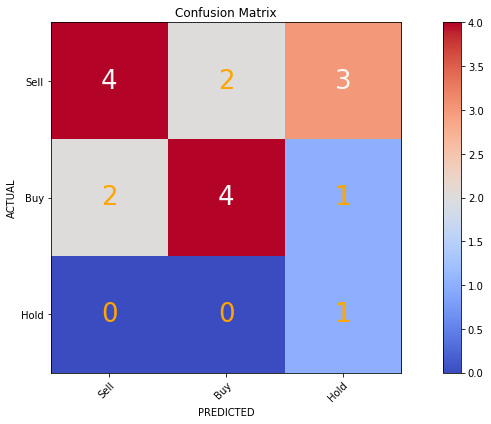

In [16]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()